In [1]:
import sys
print(sys.executable)


/Users/quokkaaa/myenv/bin/python


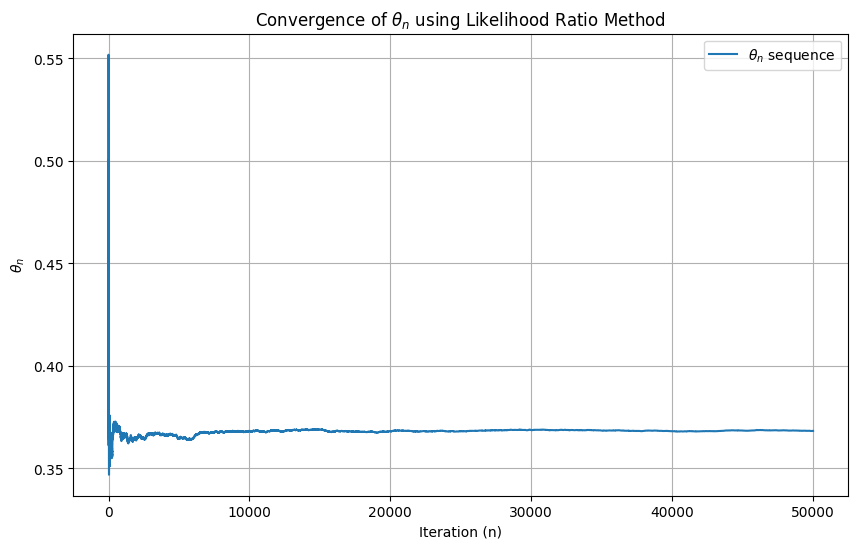

Estimated optimal theta: 0.3683


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
R = 10
C = 0.2
n_iterations = 50000
theta_0 = 0.5

# Gamma distributions parameters
gamma_params = [
    (2, 2),        # X1 ~ Gamma(2, 2)
    (2, 1),        # X2 ~ Gamma(2, 1)
    (2, 2/3)       # X3 ~ Gamma(2, 2/3)
]

# Function to estimate the probability
def estimate_probability(theta, R):
    count = 0
    for _ in range(R):
        X1 = np.random.gamma(gamma_params[0][0], 1/gamma_params[0][1])
        X2 = np.random.gamma(gamma_params[1][0], 1/gamma_params[1][1])
        X3 = np.random.gamma(gamma_params[2][0], 1/gamma_params[2][1])
        
        if max(theta * X1 + X2, (1 - theta) * X3) >= 3:
            count += 1

    return count / R

def derivative_estimate(theta, R):
    return np.random.normal(0, 1)  # Placeholder for actual implementation

# Iterative optimization procedure
thetas = [theta_0]

for n in range(1, n_iterations + 1):
    theta_n = thetas[-1]
    D_theta_n = derivative_estimate(theta_n, R)
    
    # Update rule
    theta_next = theta_n - (C / (n + 1)) * D_theta_n
    
    # Projection onto [0, 1]
    theta_next = max(0, min(1, theta_next))
    
    thetas.append(theta_next)

# Plotting the sequence of theta_n
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations + 1), thetas, label=r'$\theta_n$ sequence')
plt.xlabel('Iteration (n)')
plt.ylabel(r'$\theta_n$')
plt.title(r'Convergence of $\theta_n$ using Likelihood Ratio Method')
plt.grid()
plt.legend()
plt.show()

# Estimated optimal theta
optimal_theta = thetas[-1]
print(f"Estimated optimal theta: {optimal_theta:.4f}")


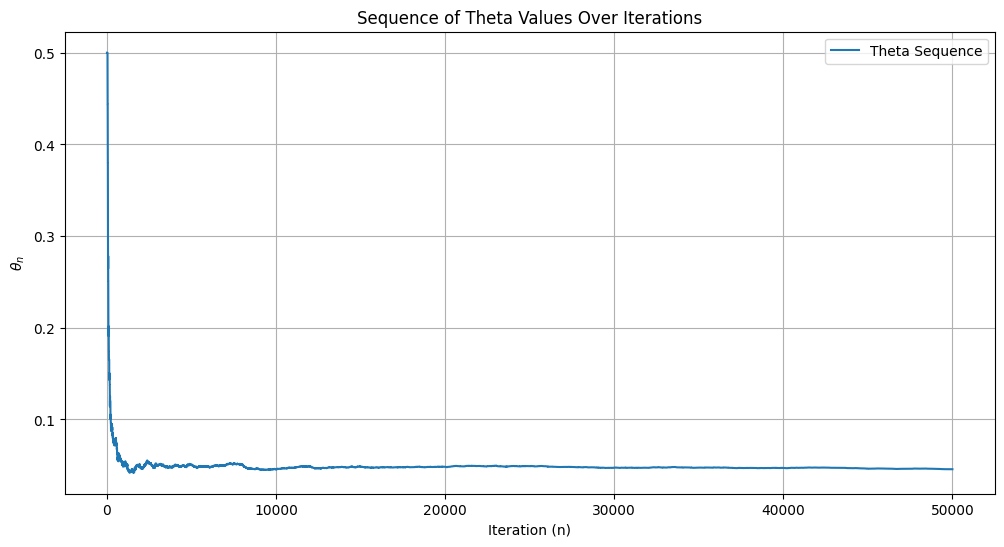

Final solution: θ = 0.0457


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

theta_0 = 0.5
C = 0.2
R = 10
N = 50000
h = 0.01

# Initialize theta sequence
theta_seq = np.zeros(N+1)
theta_seq[0] = theta_0

# Gamma distribution parameters
k1, theta1 = 2, 2
k2, theta2 = 2, 1
k3, theta3 = 2, 1.5

np.random.seed(42)

for n in range(N):
    theta_n = theta_seq[n]

    X1_samples = gamma.rvs(a=k1, scale=theta1, size=R)
    X2_samples = gamma.rvs(a=k2, scale=theta2, size=R)
    X3_samples = gamma.rvs(a=k3, scale=theta3, size=R)

    theta_plus = min(theta_n + h, 1.0)
    theta_minus = max(theta_n - h, 0.0)

    I_plus = ((theta_plus * X1_samples + X2_samples >= 3) |
              ((1 - theta_plus) * X3_samples >= 3)).astype(float)

    I_minus = ((theta_minus * X1_samples + X2_samples >= 3) |
               ((1 - theta_minus) * X3_samples >= 3)).astype(float)

    # Estimate f(theta_n + h) and f(theta_n - h)
    f_plus = np.mean(I_plus)
    f_minus = np.mean(I_minus)

    # Estimate derivative D(theta_n)
    D_theta = (f_plus - f_minus) / (2 * h)

    # Update theta
    theta_next = theta_n - (C / (n + 1)) * D_theta

    # Project onto [0,1]
    theta_next = min(max(theta_next, 0.0), 1.0)

    # Store theta_next
    theta_seq[n + 1] = theta_next

# Plot the sequence theta_n
plt.figure(figsize=(12, 6))
plt.plot(theta_seq, label='Theta Sequence')
plt.xlabel('Iteration (n)')
plt.ylabel(r'$\theta_n$')
plt.title('Sequence of Theta Values Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

theta_final = theta_seq[-1]
print(f"Final solution: θ = {theta_final:.4f}")


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters
theta_0 = 0.5
C_values = [0.05, 0.1, 0.2, 0.5, 1.0]
R = 10
N = 50000
h = 0.01

# Gamma distribution parameters
k1, theta1 = 2, 2
k2, theta2 = 2, 1
k3, theta3 = 2, 1.5

# Seed for reproducibility
np.random.seed(42)

# Store results for each C
results = {}

for C in C_values:
    theta_seq = np.zeros(N+1)
    theta_seq[0] = theta_0

    for n in range(N):
        theta_n = theta_seq[n]

        # Generate R samples for X1, X2, X3
        X1_samples = gamma.rvs(a=k1, scale=theta1, size=R)
        X2_samples = gamma.rvs(a=k2, scale=theta2, size=R)
        X3_samples = gamma.rvs(a=k3, scale=theta3, size=R)

        # Compute indicator functions at theta_n + h and theta_n - h
        theta_plus = min(theta_n + h, 1.0)
        theta_minus = max(theta_n - h, 0.0)

        I_plus = ((theta_plus * X1_samples + X2_samples >= 3) |
                  ((1 - theta_plus) * X3_samples >= 3)).astype(float)

        I_minus = ((theta_minus * X1_samples + X2_samples >= 3) |
                   ((1 - theta_minus) * X3_samples >= 3)).astype(float)

        # Estimate f(theta_n + h) and f(theta_n - h)
        f_plus = np.mean(I_plus)
        f_minus = np.mean(I_minus)

        # Estimate derivative D(theta_n)
        D_theta = (f_plus - f_minus) / (2 * h)

        # Update theta
        theta_next = theta_n - (C / (n + 1)) * D_theta

        # Project onto [0,1]
        theta_next = min(max(theta_next, 0.0), 1.0)

        # Store theta_next
        theta_seq[n + 1] = theta_next

    # Store results
    results[C] = theta_seq



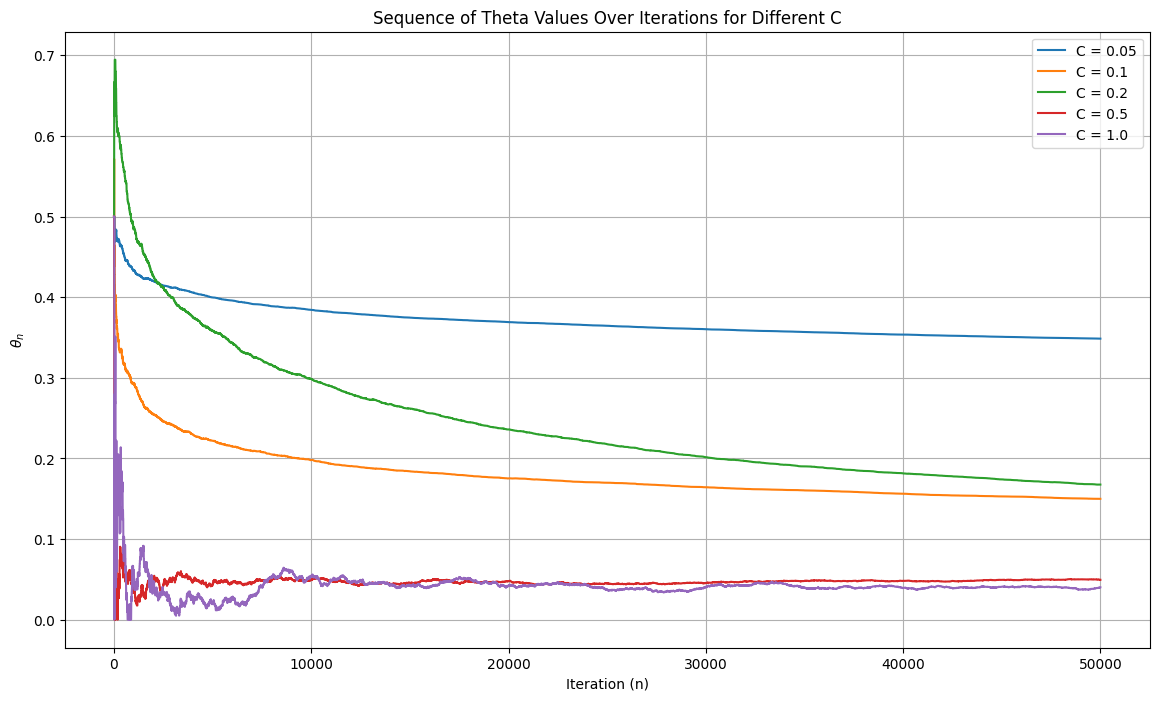

In [9]:
# Plotting
plt.figure(figsize=(14, 8))

for C in C_values:
    plt.plot(results[C], label=f'C = {C}')

plt.xlabel('Iteration (n)')
plt.ylabel(r'$\theta_n$')
plt.title('Sequence of Theta Values Over Iterations for Different C')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
for C in C_values:
    theta_final = results[C][-1]
    print(f"Final solution for C = {C}: θ = {theta_final:.4f}")



Final solution for C = 0.05: θ = 0.3485
Final solution for C = 0.1: θ = 0.1499
Final solution for C = 0.2: θ = 0.1676
Final solution for C = 0.5: θ = 0.0495
Final solution for C = 1.0: θ = 0.0402


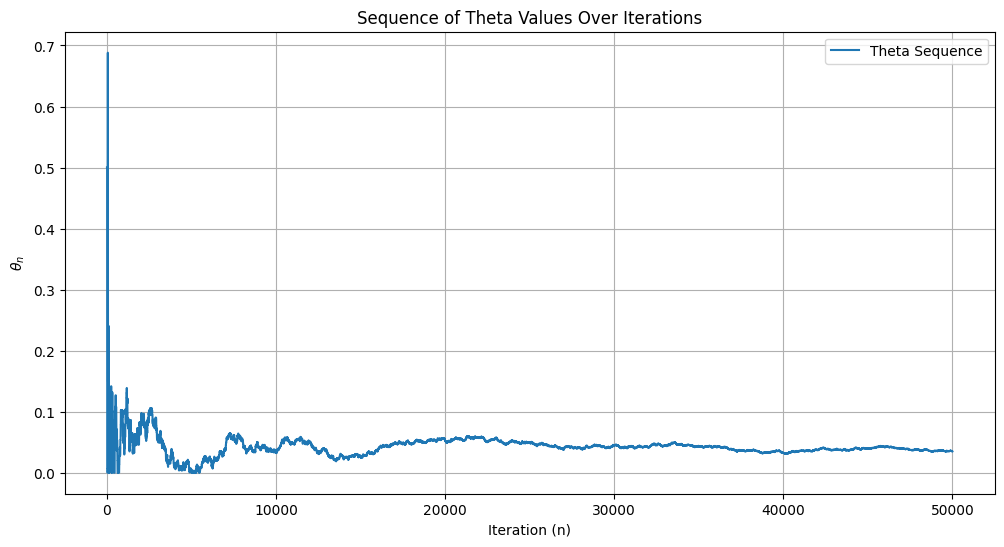

Final solution: θ = 0.0350


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters
theta_0 = 0.5
C = 2
R = 10
N = 50000
h = 0.01

# Initialize theta sequence
theta_seq = np.zeros(N+1)
theta_seq[0] = theta_0

# Gamma distribution parameters
# Gamma(k, theta) where 'k' is shape, 'theta' is scale
k1, theta1 = 2, 2
k2, theta2 = 2, 1
k3, theta3 = 2, 1.5

# Seed for reproducibility
np.random.seed(42)

for n in range(N):
    theta_n = theta_seq[n]

    # Generate R samples for X1, X2, X3
    X1_samples = gamma.rvs(a=k1, scale=theta1, size=R)
    X2_samples = gamma.rvs(a=k2, scale=theta2, size=R)
    X3_samples = gamma.rvs(a=k3, scale=theta3, size=R)

    # Compute indicator functions at theta_n + h and theta_n - h
    theta_plus = min(theta_n + h, 1.0)
    theta_minus = max(theta_n - h, 0.0)

    I_plus = ((theta_plus * X1_samples + X2_samples >= 3) |
              ((1 - theta_plus) * X3_samples >= 3)).astype(float)

    I_minus = ((theta_minus * X1_samples + X2_samples >= 3) |
               ((1 - theta_minus) * X3_samples >= 3)).astype(float)

    # Estimate f(theta_n + h) and f(theta_n - h)
    f_plus = np.mean(I_plus)
    f_minus = np.mean(I_minus)

    # Estimate derivative D(theta_n)
    D_theta = (f_plus - f_minus) / (2 * h)

    # Update theta
    theta_next = theta_n - (C / (n + 1)) * D_theta

    # Project onto [0,1]
    theta_next = min(max(theta_next, 0.0), 1.0)

    # Store theta_next
    theta_seq[n + 1] = theta_next

# Plot the sequence theta_n
plt.figure(figsize=(12, 6))
plt.plot(theta_seq, label='Theta Sequence')
plt.xlabel('Iteration (n)')
plt.ylabel(r'$\theta_n$')
plt.title('Sequence of Theta Values Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Final solution
theta_final = theta_seq[-1]
print(f"Final solution: θ = {theta_final:.4f}")



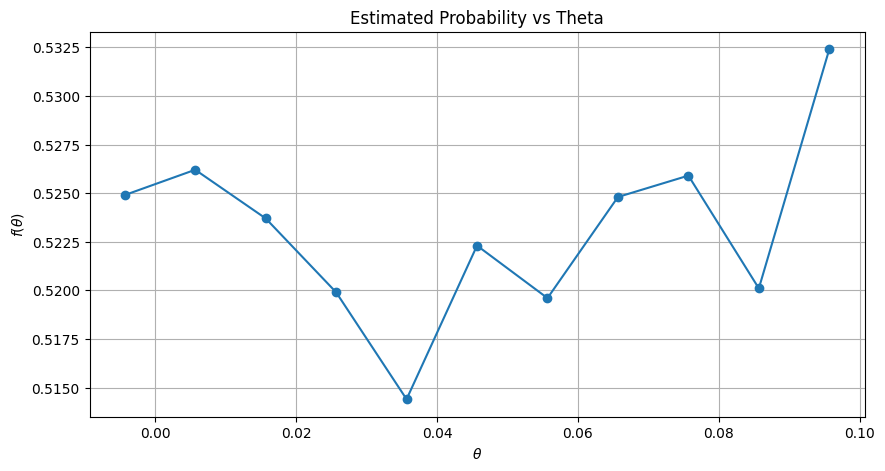

In [12]:
# Define a function to estimate f(theta)
def estimate_f(theta, num_samples=10000):
    X1 = gamma.rvs(a=k1, scale=theta1, size=num_samples)
    X2 = gamma.rvs(a=k2, scale=theta2, size=num_samples)
    X3 = gamma.rvs(a=k3, scale=theta3, size=num_samples)

    I = ((theta * X1 + X2 >= 3) | ((1 - theta) * X3 >= 3)).astype(float)
    return np.mean(I)

# Evaluate f(theta) around theta_final
theta_values = np.linspace(theta_final - 0.05, theta_final + 0.05, 11)
f_values = [estimate_f(theta) for theta in theta_values]

# Plot f(theta) vs theta
plt.figure(figsize=(10, 5))
plt.plot(theta_values, f_values, marker='o')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.title('Estimated Probability vs Theta')
plt.grid(True)
plt.show()
